# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


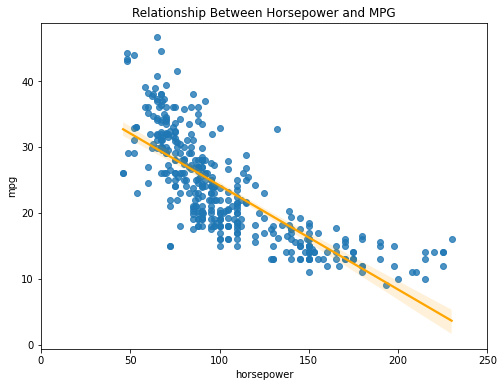

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- We are looking at optimizing (reducing) loss
- We are looking at a loss or a cost function
- Lowest error is minimum or the optimum slope, there appears to be a global minimum at a slope of -.159


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

- We step down the curve the opposite of the gradient OR inverse of the gradient b the gradient will always be the steepest increase but becasue we want to fine the minimum, we will always go the opposite or DOWN the cost function.

- As we get closer to the minimum, the steps get smaller in proportion to the derivative of the slope.

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- steps more inverse to slope
- steps get smaller closer you get to 0, the gradient
- directly proportional to the size of the gradient (the derivative of the slope?)
- too small of a step takes forever!, too large of a step (might not find the minimum)
- learning rate is the proportion of the gradient that we used to take our step
    - if the learnign rate is 1, it's a 1:1 
    - typically a float between zero and 1
    
- Here's an elegant solution: Make the size of your step **proportional to the value of the derivative at the point where you currently are in parameter space**! If we're very far from the minimum, then our values will be large, and so we therefore ca safely take a large step; if we're close to the minimum, then our values will be small, and so we should therefore take a smaller step.

- I said the size of the step is proportional to the value of the derivative. The constant of proportionality is often called the **"learning rate"**.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- What kind of target is a logistic regression model used for?
    - Categorical or classification, multi-class or binary
- What are the predictions that a logistic regression model outputs?
    - Technical Answer: ln(y / 1-y) = predicting the log-odds of target value
    - Less Technical Answer (.predict_proba): returns probabilities of being each class (prob of class 0 or class 1, respectively)
    - Less Technical Answer 2 (.predict): class prediction based on the threshold (default typically .5)
        - a threshold will split the values into class 0 if below .5, and class 1 if greater than or equal to .5
- How is it different from linear regression?
    - Categorical in logisitc regression vs. continuous numeric variable output in linear regression. 
- Is it a parametric or non-parametric model?
    - Parametric because it has 'weights' or coefficients that establish set changes in variables
        - Parametric, optimizing for the best parameters (are the coefficients, otherwise known as model weights or parameters)


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- Compared to a linear model: categorical outcomes would be best modeled with a logistic model whereas the linear model would be great for getting a continuous numeric variable
- decision tree is more prone to overfitting

- logistic regression is less prone to noise (irreducible error) than a decision tree
    - want a model to generalize well - not get boggeed down by the individual nuances, we want to generally capture the pattern overall. Whereas a decision tree will see that noise and get TOO specific and overfit. 

- need to scale/normalize for logistic but not for decision trees
- decision tress work better with outliers
- logistic regression more sensitive to outliers then decision trees
- logisitic regression will probably work better out the gate (untuned) on class imbalance

- decision trees will overfit to outliers accidentally



## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Class imbalance for target, 74% class 0, 25.5 class 1


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Dummy model always predict class 0 (strategy = 'most_frequent')
- Accuracy would be 74%
    - 74 % True Negatives
    - 26% False Negatives


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 75% accurate on the test data.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- We should think about using an alternative metric like recall or precision or f1_score
- Use some form of re-sampling --> oversampling or undersampling. In this case not enough data to undersample (and undersampling is never a good choice unless there is a TON of data because you always lose some data)
- class_weight hyperparameter (set to 'balanced' or manually assign weights)


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

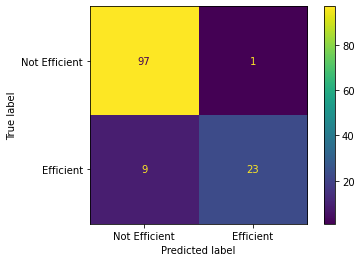

In [22]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_sc, y_test, display_labels=['Not Efficient', 'Efficient']);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [24]:
# Accuracy
y_test_pred = logreg.predict(X_test_sc)
accuracy_score(y_test, y_test_pred)

0.9230769230769231

In [25]:
# Precision
precision = precision_score(y_test, y_test_pred)
precision

0.9583333333333334

In [26]:
# Recall
recall = recall_score(y_test, y_test_pred)
recall

0.71875

In [27]:
# F1-Score
f1_score(y_test, y_test_pred)

0.8214285714285714

In [28]:
2 * precision * recall / (precision + recall)

0.8214285714285714

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [31]:
# call_on_students(1)

In [32]:
probas = logreg.predict_proba(X_test_sc)[:, 1]
probas

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [33]:
# Calculate roc-auc
roc_auc_score(y_test, probas)

0.9811862244897959

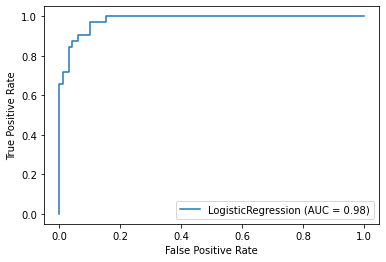

In [34]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [35]:
# call_on_students(1)

#### Answer:

- model is looking pretty good, mostly high scores for test data (unseen data).
- recall score is a bit low indicating more false negatives than desired


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [36]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

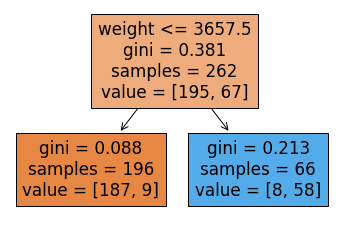

In [37]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

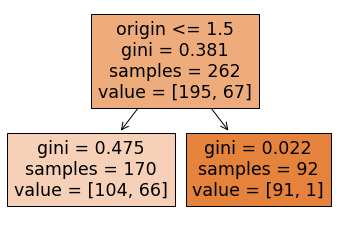

In [38]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [39]:
# call_on_students(1)

#### Answer:

- 'The most pure split'
    - First one (weight!)
    - Data is partitioned (separated) better in the first one
    - ANOTHER option: add the Gini scores (impurity)! the weights partition Gini score is .088 + .213, while the origin partition Gini score is .475 + .022


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [40]:
# call_on_students(1)

In [41]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sc, y_train) # you don't need to scale for a decision tree, so the X_train data would work here too!

DecisionTreeClassifier(random_state=42)

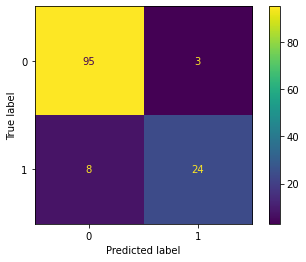

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_sc, y_test) # continuing to use scaled X values for consistency tho it don't matter

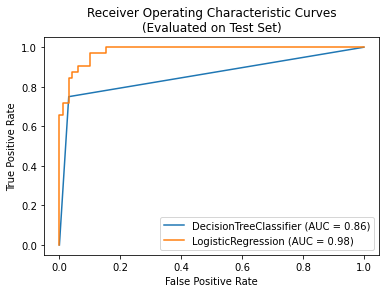

In [43]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [44]:
# call_on_students(1)

#### Answer:

- Logistic Regression model is better according to the ROC-AUC score because the LogReg score is closer to 1
